In [3]:
!kaggle datasets download -d ziya07/smart-meter-electricity-consumption-dataset

Dataset URL: https://www.kaggle.com/datasets/ziya07/smart-meter-electricity-consumption-dataset
License(s): CC0-1.0
smart-meter-electricity-consumption-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:

import zipfile 
dataset = "/kaggle/working/smart-meter-electricity-consumption-dataset.zip"
zip_ref = zipfile.ZipFile(dataset, "r")
zip_ref.extractall()
zip_ref.close()

In [5]:
import pandas as pd
data=pd.read_csv("/kaggle/working/smart_meter_data.csv")
data.head()

,Timestamp,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly_Label
0,2024-01-01 00:00:00,0.457786,0.469524,0.396368,0.445441,0.692057,Normal
1,2024-01-01 00:30:00,0.351956,0.465545,0.451184,0.458729,0.539874,Normal
2,2024-01-01 01:00:00,0.482948,0.285415,0.408289,0.470360,0.614724,Normal
3,2024-01-01 01:30:00,0.628838,0.482095,0.512308,0.576241,0.757044,Normal
4,2024-01-01 02:00:00,0.335974,0.624741,0.672021,0.373004,0.673981,Normal


In [6]:
data.isnull().sum()

Timestamp               0
Electricity_Consumed    0
Temperature             0
Humidity                0
Wind_Speed              0
Avg_Past_Consumption    0
Anomaly_Label           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             5000 non-null   object 
 1   Electricity_Consumed  5000 non-null   float64
 2   Temperature           5000 non-null   float64
 3   Humidity              5000 non-null   float64
 4   Wind_Speed            5000 non-null   float64
 5   Avg_Past_Consumption  5000 non-null   float64
 6   Anomaly_Label         5000 non-null   object 
dtypes: float64(5), object(2)
memory usage: 273.6+ KB


In [8]:
data.describe()

,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.376677,0.525069,0.497632,0.464628,0.458738
std,0.164117,0.135603,0.146781,0.120370,0.146749
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265349,0.434253,0.398956,0.382906,0.358857
50%,0.377244,0.524052,0.497539,0.464958,0.457814
75%,0.486002,0.617281,0.595359,0.547419,0.555607
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Anomaly_Label']=le.fit_transform(data['Anomaly_Label'])

In [10]:
data=data.drop(columns=['Timestamp'])

In [11]:
data.head()

,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly_Label
0,0.457786,0.469524,0.396368,0.445441,0.692057,1
1,0.351956,0.465545,0.451184,0.458729,0.539874,1
2,0.482948,0.285415,0.408289,0.470360,0.614724,1
3,0.628838,0.482095,0.512308,0.576241,0.757044,1
4,0.335974,0.624741,0.672021,0.373004,0.673981,1


In [12]:
data['Anomaly_Label'].value_counts()

Anomaly_Label
1    4750
0     250
Name: count, dtype: int64

In [13]:
data=data.groupby('Anomaly_Label').sample(n=250,random_state=42)

In [14]:
data['Anomaly_Label'].value_counts()

Anomaly_Label
0    250
1    250
Name: count, dtype: int64

In [15]:
x=data.drop(columns='Anomaly_Label')
y=data['Anomaly_Label']

In [16]:
print(x)

      Electricity_Consumed  Temperature  Humidity  Wind_Speed  \
3156              0.168762     0.550832  0.310143    0.468697   
214               0.322455     0.574759  0.214893    0.506367   
2313              0.457957     0.265166  0.303563    0.493398   
1453              0.808614     0.443306  0.344338    0.379723   
2640              0.676551     0.248814  0.282963    0.587387   
...                    ...          ...       ...         ...   
3676              0.387199     0.554239  0.444087    0.341023   
4379              0.245583     0.547483  0.621456    0.796550   
172               0.362150     0.470750  0.590141    0.326608   
1812              0.643703     0.414012  0.454316    0.533801   
136               0.244458     0.590745  0.320701    0.398175   

      Avg_Past_Consumption  
3156              0.081102  
214               0.806402  
2313              0.892730  
1453              0.737689  
2640              0.743960  
...                    ...  
3676            

In [17]:
print(y)

3156    0
214     0
2313    0
1453    0
2640    0
       ..
3676    1
4379    1
172     1
1812    1
136     1
Name: Anomaly_Label, Length: 500, dtype: int64


Feature Selection

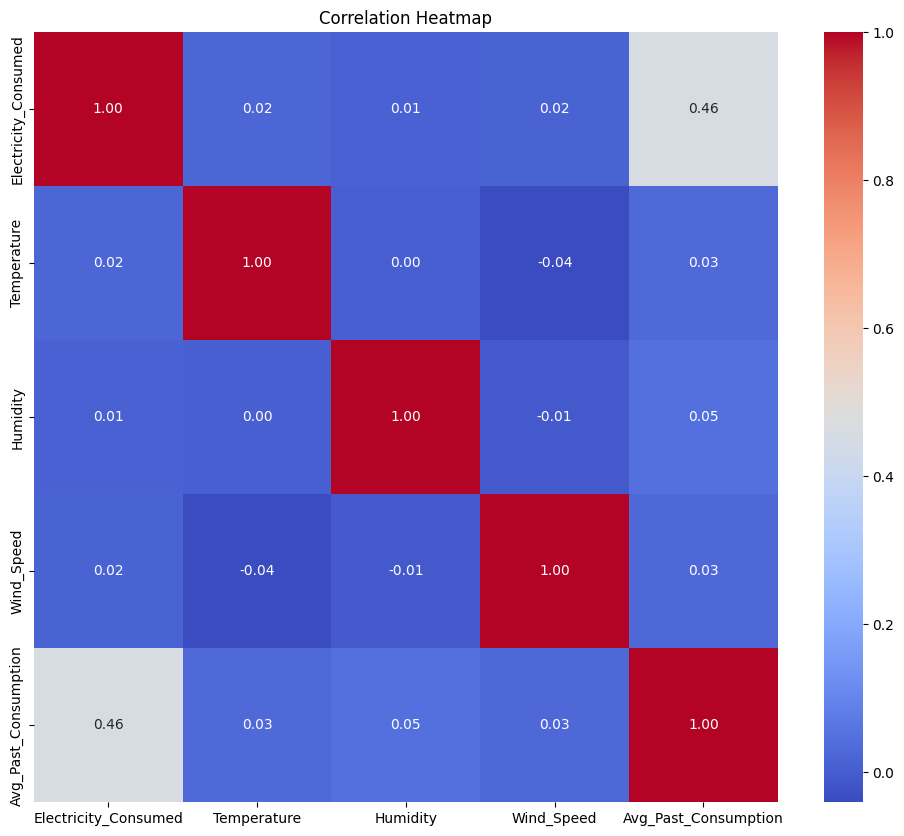

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix =x.corr()
# Display heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
# Set a threshold for correlation
threshold = 0.9

# Find correlated feature pairs
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = [(a, b) for (a, b) in corr_pairs.index if a != b and corr_matrix.loc[a, b] > threshold]

# Create a set of features to drop
to_drop = set()
for a, b in high_corr_pairs:
    if b not in to_drop:  # avoid dropping both
        to_drop.add(a)

print("Highly correlated features to drop:", to_drop)

# Drop from original dataframe
x_reduced = x.drop(columns=to_drop)


Highly correlated features to drop: set()


In [20]:
# Correlation with target
target_corr = data.corr()["Anomaly_Label"].sort_values(ascending=False)
print("Correlation with target:\n", target_corr)

Correlation with target:
 Anomaly_Label           1.000000
Temperature             0.074883
Humidity                0.052612
Avg_Past_Consumption    0.045082
Electricity_Consumed    0.005008
Wind_Speed             -0.006404
Name: Anomaly_Label, dtype: float64


Feature Selection using Statistical Tests

In [21]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

In [22]:
X_chi2 = x.copy()
X_chi2 = X_chi2.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_chi2, y)
print("Chi-square scores:", chi2_selector.scores_)

Chi-square scores: [0.00205574 0.15477641 0.08283433 0.00102816 0.12203836]


In [23]:
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(x, y)
print("ANOVA F-scores:", anova_selector.scores_)

ANOVA F-scores: [0.01249162 2.80823484 1.38231819 0.02042168 1.0141942 ]


In [24]:
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(x, y)
print("Mutual Information:", mi_selector.scores_)

Mutual Information: [0.23102798 0.         0.02805127 0.00995373 0.25446036]


Feature selection using Models

In [25]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
import numpy as np

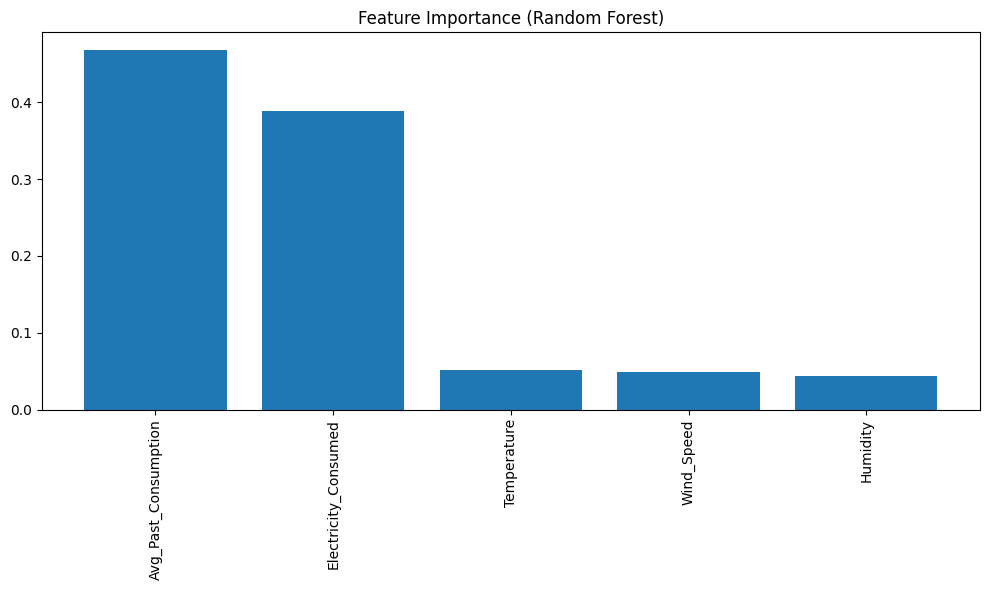

In [26]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y)

# Get feature importances
importances_rf = rf.feature_importances_

# Visualize
plt.figure(figsize=(10,6))
sorted_idx = np.argsort(importances_rf)[::-1]
plt.bar(range(x.shape[1]), importances_rf[sorted_idx])
plt.xticks(range(x.shape[1]), x.columns[sorted_idx], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


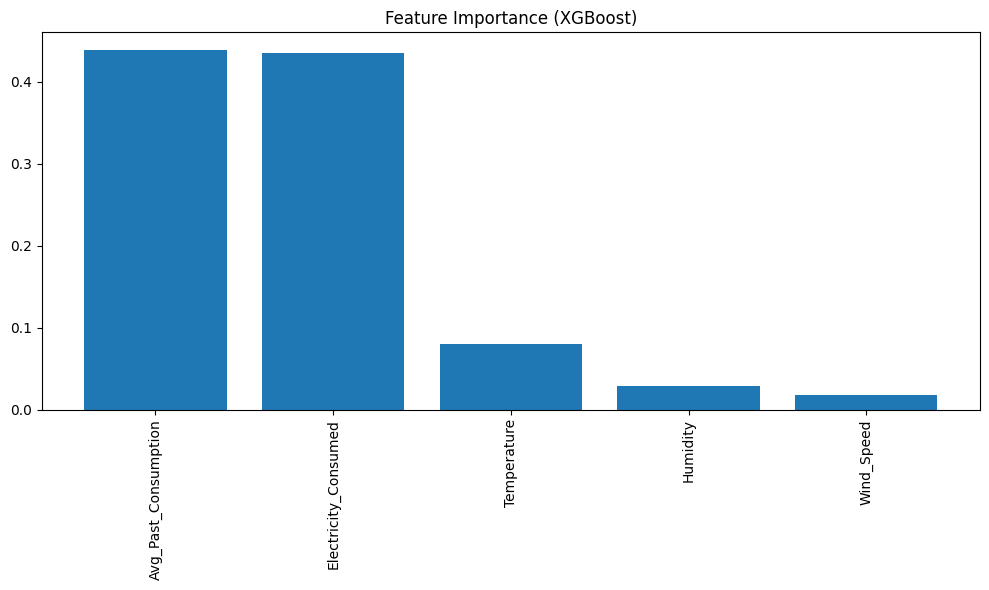

In [27]:
# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x, y)

# Get feature importances
importances_xgb = xgb.feature_importances_

# Visualize
plt.figure(figsize=(10,6))
sorted_idx = np.argsort(importances_xgb)[::-1]
plt.bar(range(x.shape[1]), importances_xgb[sorted_idx])
plt.xticks(range(x.shape[1]), x.columns[sorted_idx], rotation=90)
plt.title("Feature Importance (XGBoost)")
plt.tight_layout()
plt.show()


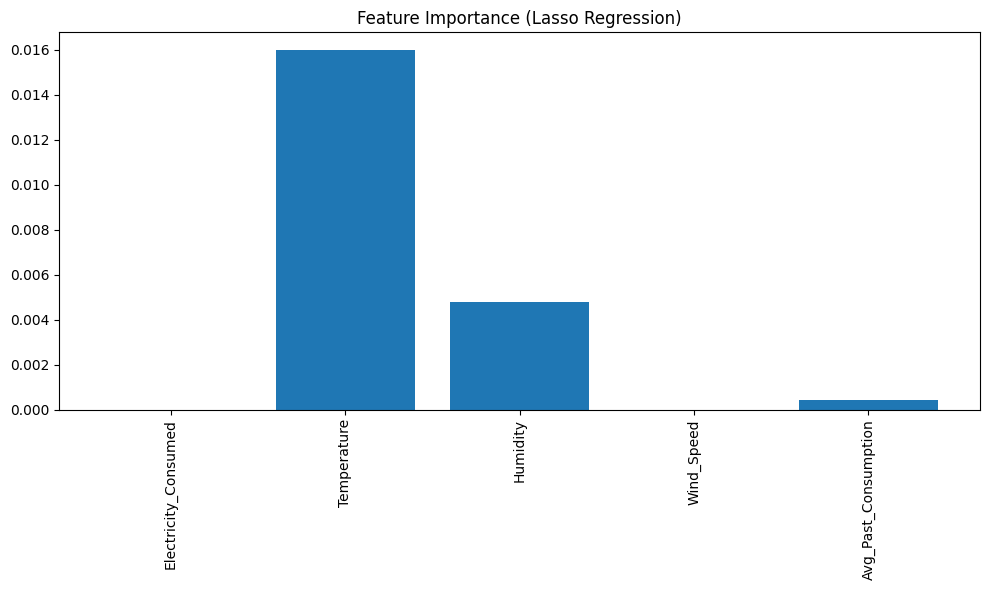

Features eliminated by Lasso (coeff = 0): ['Electricity_Consumed', 'Wind_Speed']


In [28]:
from sklearn.preprocessing import StandardScaler

# Scale features before Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Train Lasso
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# Get coefficients
coeffs = lasso.coef_

# Visualize
plt.figure(figsize=(10,6))
plt.bar(range(x.shape[1]), np.abs(coeffs))
plt.xticks(range(x.shape[1]), x.columns, rotation=90)
plt.title("Feature Importance (Lasso Regression)")
plt.tight_layout()
plt.show()

# Optional: See which features were zeroed
zeroed_features = x.columns[coeffs == 0]
print("Features eliminated by Lasso (coeff = 0):", list(zeroed_features))


In [29]:
data.head()

,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly_Label
3156,0.168762,0.550832,0.310143,0.468697,0.081102,0
214,0.322455,0.574759,0.214893,0.506367,0.806402,0
2313,0.457957,0.265166,0.303563,0.493398,0.892730,0
1453,0.808614,0.443306,0.344338,0.379723,0.737689,0
2640,0.676551,0.248814,0.282963,0.587387,0.743960,0


In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Logistic Regression model 

In [33]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()

In [34]:
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [35]:
logistic_model.score(x_test,y_test)

0.58

Support Vector Regression model

In [36]:
from sklearn.svm import SVR
svm_model=SVR()

In [37]:
svm_model.fit(x_train,y_train)

SVR()

In [38]:
svm_model.score(x_test,y_test)

0.6906896698673763

Confusion matrix of logistic model

In [39]:
after_train=logistic_model.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cf_matrix=confusion_matrix(y_test,after_train)

print(cf_matrix)

[[31 15]
 [27 27]]


<Axes: >

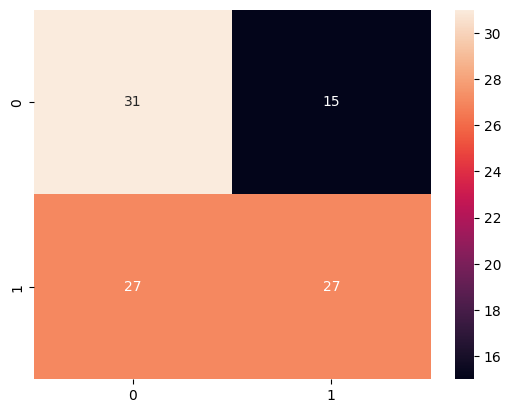

In [42]:
import seaborn as sns
sns.heatmap(cf_matrix,annot=True)

In [43]:
from sklearn.metrics import recall_score

In [44]:
# recall for test data prediction
recall_test=recall_score(after_train,y_test)
print("Test data recall ",recall_test)

Test data recall  0.6428571428571429


In [45]:
from sklearn.metrics import f1_score

In [46]:
# recall for test data prediction
f1_score_test=f1_score(after_train,y_test)
print("Test data f1_score ",f1_score_test)

Test data f1_score  0.5625000000000001


In [47]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [48]:
x_test.shape

(100, 5)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
x_train1 = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(x_train1.shape[1], x_train1.shape[2])
))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
# Compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
lstm_model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4379 - loss: 0.6933
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5277 - loss: 0.6878
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5211 - loss: 0.6905
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5809 - loss: 0.6671
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6543 - loss: 0.6454
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6477 - loss: 0.6324
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6924 - loss: 0.6063
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7369 - loss: 0.5812
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7228 - loss: 0.5669
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7266 - loss: 0.5524


In [51]:
lstm_model.evaluate(x_test, y_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7450 - loss: 0.5384  


[0.5729845762252808, 0.7400000095367432]

Using Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        46
           1       0.93      0.94      0.94        54

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



Random Forest 

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.97
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        46
           1       1.00      0.94      0.97        54

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



Bagging Technique

In [54]:

from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

base_model = DecisionTreeClassifier()

bagging_clf = BaggingClassifier(base_estimator=base_model,
                                 n_estimators=50,        
                                 max_samples=0.8,       
                                 bootstrap=True,         
                                 random_state=42)

# Train model
bagging_clf.fit(x_train, y_train)

# Predict
y_pred = bagging_clf.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        46
           1       1.00      0.93      0.96        54

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosting technique using AdaBoost

In [55]:
from sklearn.ensemble import AdaBoostClassifier

base_model = DecisionTreeClassifier()
boosting_model = AdaBoostClassifier(
    base_estimator=base_model,
    n_estimators=50,      
    learning_rate=1.0,
    random_state=42
)

boosting_model.fit(x_train, y_train)

y_pred = boosting_model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.94      0.94      0.94        54

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [58]:
import joblib

# Save the model
joblib.dump(rf_model, "my_model.pkl")


['my_model.pkl']